In [1]:
from sdv import load_demo
from sdv import Metadata

In [2]:
tables = load_demo()

In [3]:
tables['users']

,user_id,country,gender,age
0,0,US,M,34
1,1,UK,F,23
2,2,ES,None,44
3,3,UK,M,22
4,4,US,F,54
5,5,DE,M,57
6,6,BG,F,45
7,7,ES,None,41
8,8,FR,F,23
9,9,UK,None,30


In [4]:
tables['sessions']

,session_id,user_id,device,os,minutes
0,0,0,mobile,android,23
1,1,1,tablet,ios,12
2,2,2,tablet,android,8
3,3,3,mobile,android,13
4,4,4,mobile,ios,9
5,5,5,mobile,android,32
6,6,6,mobile,ios,7
7,7,7,tablet,ios,21
8,8,8,mobile,ios,29
9,9,9,tablet,ios,34


In [5]:
tables['transactions']

,transaction_id,session_id,timestamp,amount,cancelled
0,0,0,2019-01-01 12:34:32,100.0,False
1,1,1,2019-01-01 12:42:21,55.3,False
2,2,2,2019-01-07 17:23:11,79.5,False
3,3,3,2019-01-10 11:08:57,112.1,True
4,4,4,2019-01-10 21:54:08,110.0,True
5,5,5,2019-01-11 11:21:20,76.3,False
6,6,6,2019-01-22 14:44:10,89.5,False
7,7,7,2019-01-23 10:14:09,132.1,True
8,8,8,2019-01-27 16:09:17,68.0,False
9,9,9,2019-01-29 12:10:48,99.9,False


In [6]:
metadata = Metadata()
metadata

Metadata
  root_path: .
  tables: []
  relationships:

In [7]:
metadata.add_table(name='users', data=tables['users'], primary_key='user_id')

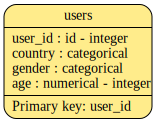

In [8]:
metadata.visualize()

In [10]:
metadata.get_table_meta('users')

{'fields': {'user_id': {'type': 'id', 'subtype': 'integer'},
  'country': {'type': 'categorical'},
  'gender': {'type': 'categorical'},
  'age': {'type': 'numerical', 'subtype': 'integer'}},
 'primary_key': 'user_id'}

In [15]:
metadata.add_table(name='sessions', data=tables['sessions'], primary_key='session_id', parent='users', foreign_key='user_id')

In [16]:
transactions_fields = {
    'timestamp': {
    'type': 'datetime',
    'format': '%Y-%m-%d'
    }
}

In [17]:
metadata.add_table(name='transactions', data=tables['transactions'], fields_metadata=transactions_fields, primary_key='transaction_id', parent='sessions')

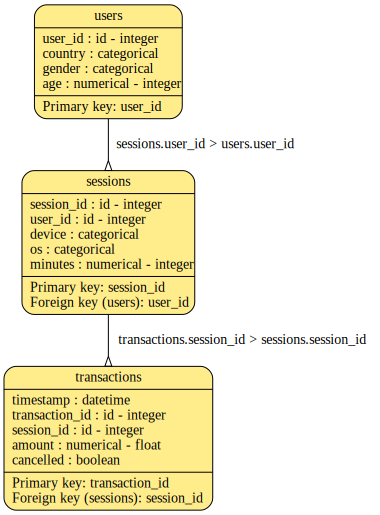

In [18]:
metadata.visualize()

In [19]:
metadata.to_dict()

{'tables': {'users': {'fields': {'user_id': {'type': 'id',
     'subtype': 'integer'},
    'country': {'type': 'categorical'},
    'gender': {'type': 'categorical'},
    'age': {'type': 'numerical', 'subtype': 'integer'}},
   'primary_key': 'user_id'},
  'sessions': {'fields': {'session_id': {'type': 'id', 'subtype': 'integer'},
    'user_id': {'type': 'id',
     'subtype': 'integer',
     'ref': {'table': 'users', 'field': 'user_id'}},
    'device': {'type': 'categorical'},
    'os': {'type': 'categorical'},
    'minutes': {'type': 'numerical', 'subtype': 'integer'}},
   'primary_key': 'session_id'},
  'transactions': {'fields': {'timestamp': {'type': 'datetime',
     'format': '%Y-%m-%d'},
    'transaction_id': {'type': 'id', 'subtype': 'integer'},
    'session_id': {'type': 'id',
     'subtype': 'integer',
     'ref': {'table': 'sessions', 'field': 'session_id'}},
    'amount': {'type': 'numerical', 'subtype': 'float'},
    'cancelled': {'type': 'boolean'}},
   'primary_key': 'trans

---

In [20]:
from sdv.relational import HMA1

In [22]:
model1 = HMA1(metadata)

In [23]:
model1.fit(tables)

d:\Environment\anaconda3\envs\msc_project\lib\site-packages\sdv\relational\hma.py:255: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table.reset_index(inplace=True)


In [24]:
new_data = model1.sample()

In [25]:
new_data

{'users':    user_id country gender  age
 0        0      US      F   37
 1        1      US      F   29
 2        2      UK      M   37
 3        3      DE    NaN   42
 4        4      ES    NaN   53
 5        5      BG      M   22
 6        6      US      M   47
 7        7      ES      M   30
 8        8      UK      M   38
 9        9      ES      M   52,
 'sessions':    session_id  user_id  device       os  minutes
 0           0        0  mobile  android       17
 1           1        1  mobile      ios        7
 2           2        2  mobile  android        7
 3           3        3  tablet  android       15
 4           4        4  mobile  android       31
 5           5        5  mobile  android       33
 6           6        6  tablet  android       13
 7           7        7  mobile  android        7
 8           8        8  tablet  android        7
 9           9        9  mobile      ios       31,
 'transactions':             timestamp  transaction_id  session_id  amount 

---

In [28]:
model1.save('my_test_hma1_model.pkl')

In [30]:
loaded = HMA1.load('my_test_hma1_model.pkl')

dict_keys(['users', 'sessions', 'transactions'])

In [ ]:
new_data = loaded.sample(num_rows=1000)

In [ ]:
new_data.keys()

---

## Timeseries

In [32]:
from sdv.demo import load_timeseries_demo

data = load_timeseries_demo()

In [37]:
data.head()

,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAPL,2018-12-31,39.632500,39.435001,140014000,7.378734e+11,Technology,Computer Manufacturing
1,AAPL,2019-01-02,38.722500,39.480000,148158800,7.378734e+11,Technology,Computer Manufacturing
2,AAPL,2019-01-03,35.994999,35.547501,365248800,7.378734e+11,Technology,Computer Manufacturing
3,AAPL,2019-01-04,36.132500,37.064999,234428400,7.378734e+11,Technology,Computer Manufacturing
4,AAPL,2019-01-07,37.174999,36.982498,219111200,7.378734e+11,Technology,Computer Manufacturing


In [38]:
entity_columns = ['Symbol']
context_columns = ['MarketCap', 'Sector', 'Industry']
sequence_index = 'Date'

In [39]:
from sdv.timeseries import PAR

In [40]:
model = PAR(entity_columns=entity_columns,context_columns=context_columns,sequence_index=sequence_index,)